<a href="https://colab.research.google.com/github/AndrejHorvat1/Multibeam-Forward-Looking-Sonar/blob/main/UATD_CANNY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
import cv2
import shutil
from glob import glob

augmented_base = "/content/drive/MyDrive/UATD_YOLO_Dataset_v2"

canny_base = "/content/drive/MyDrive/UATD_YOLO_Dataset_CANNY"
os.makedirs(f"{canny_base}/images/train", exist_ok=True)
os.makedirs(f"{canny_base}/images/val", exist_ok=True)
os.makedirs(f"{canny_base}/labels/train", exist_ok=True)
os.makedirs(f"{canny_base}/labels/val", exist_ok=True)

for subset in ["train", "val"]:
    image_paths = sorted(glob(os.path.join(augmented_base, f"images/{subset}/*.jpg")))

    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        img_id = os.path.splitext(img_name)[0]

        label_path = os.path.join(augmented_base, f"labels/{subset}/{img_id}.txt")
        if not os.path.exists(label_path):
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        edges = cv2.Canny(img, threshold1=50, threshold2=150)

        edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

        cv2.imwrite(os.path.join(canny_base, f"images/{subset}/{img_name}"), edges_rgb)

        shutil.copy(label_path, os.path.join(canny_base, f"labels/{subset}/{img_id}.txt"))

        print(f"Obradio: {subset}/{img_name}")

print("\nCANNY skup spremljen na Driveu u:", canny_base)


Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
Obradio: train/06387.jpg
Obradio: train/06387_aug.jpg
Obradio: train/06389.jpg
Obradio: train/06389_aug.jpg
Obradio: train/06390.jpg
Obradio: train/06390_aug.jpg
Obradio: train/06391.jpg
Obradio: train/06391_aug.jpg
Obradio: train/06392.jpg
Obradio: train/06392_aug.jpg
Obradio: train/06393.jpg
Obradio: train/06393_aug.jpg
Obradio: train/06395.jpg
Obradio: train/06395_aug.jpg
Obradio: train/06397.jpg
Obradio: train/06397_aug.jpg
Obradio: train/06398.jpg
Obradio: train/06398_aug.jpg
Obradio: train/06399.jpg
Obradio: train/06399_aug.jpg
Obradio: train/06400.jpg
Obradio: train/06400_aug.jpg
Obradio: train/06402.jpg
Obradio: train/06402_aug.jpg
Obradio: train/06403.jpg
Obradio: train/06403_aug.jpg
Obradio: train/06404.jpg
Obradio: train/06404_aug.jpg
Obradio: train/06405.jpg
Obradio: train/06405_aug.jpg
Obradio: train/06406.jpg
Obradio: train/06406_aug.jpg
Obradio: train/06408.jpg
Obradio: train/06408_aug.jpg
Obradio: train/06

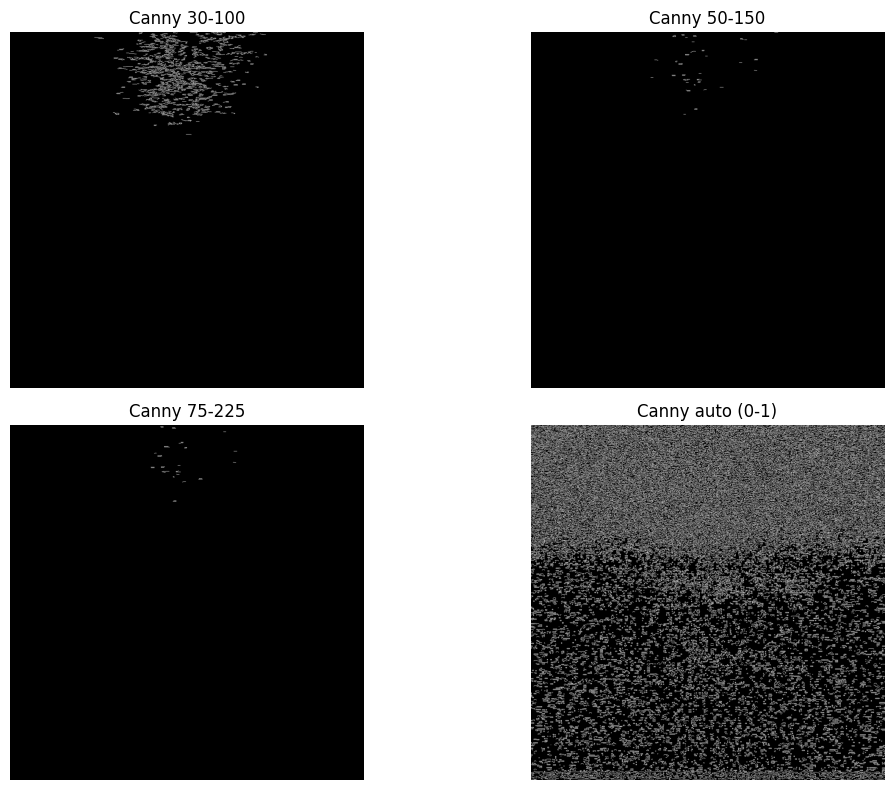

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_canny_variants(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Tri ručne i jedna automatska
    edges1 = cv2.Canny(img, 30, 100)
    edges2 = cv2.Canny(img, 100, 200)
    edges3 = cv2.Canny(img, 75, 225)

    # Auto-Canny
    v = np.median(img)
    lower = int(max(0, (1.0 - 0.33) * v))
    upper = int(min(255, (1.0 + 0.33) * v))
    edges_auto = cv2.Canny(img, lower, upper)

    titles = ['30-100', '50-150', '75-225', f'auto ({lower}-{upper})']
    edges = [edges1, edges2, edges3, edges_auto]

    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(edges[i], cmap='gray')
        plt.title(f'Canny {titles[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Primjer:
show_canny_variants("/content/drive/MyDrive/UATD_YOLO_Dataset_v2/images/train/00001.jpg")